In [1]:
!pip install ortools

In [2]:
import numpy as np
from ortools.linear_solver import pywraplp
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
%matplotlib inline

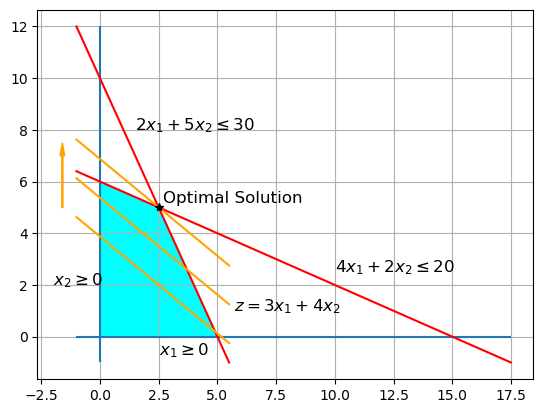

In [3]:
fig, ax = plt.subplots()
ax.grid()

# Draw constraint lines
ax.hlines(0, -1, 17.5)
ax.vlines(0, -1, 12)
ax.plot(np.linspace(-1, 17.5, 100), 6-0.4*np.linspace(-1, 17.5, 100), color="r")
ax.plot(np.linspace(-1, 5.5, 100), 10-2*np.linspace(-1, 5.5, 100), color="r")
ax.text(1.5, 8, "$2x_1 + 5x_2 \leq 30$", size=12)
ax.text(10, 2.5, "$4x_1 + 2x_2 \leq 20$", size=12)
ax.text(-2, 2, "$x_2 \geq 0$", size=12)
ax.text(2.5, -0.7, "$x_1 \geq 0$", size=12)

# Draw the feasible region
feasible_set = Polygon(np.array([[0, 0],
                                 [0, 6],
                                 [2.5, 5],
                                 [5, 0]]),
                       color="cyan")
ax.add_patch(feasible_set)

# Draw the objective function
ax.plot(np.linspace(-1, 5.5, 100), 3.875-0.75*np.linspace(-1, 5.5, 100), color="orange")
ax.plot(np.linspace(-1, 5.5, 100), 5.375-0.75*np.linspace(-1, 5.5, 100), color="orange")
ax.plot(np.linspace(-1, 5.5, 100), 6.875-0.75*np.linspace(-1, 5.5, 100), color="orange")
ax.arrow(-1.6, 5, 0, 2, width = 0.05, head_width=0.2, head_length=0.5, color="orange")
ax.text(5.7, 1, "$z = 3x_1 + 4x_2$", size=12)

# Draw the optimal solution
ax.plot(2.5, 5, "*", color="black")
ax.text(2.7, 5.2, "Optimal Solution", size=12)

plt.show()

In [4]:
# Instantiate a GLOP(Google Linear Optimization Package) solver
solver = pywraplp.Solver.CreateSolver('GLOP')

In [5]:
# Create the two variables and let them take on any non-negative value.
x1 = solver.NumVar(0, solver.infinity(), 'x1')
x2 = solver.NumVar(0, solver.infinity(), 'x2')

In [6]:
# Constraint 1: 2x_1 + 5x_2 <= 30.0
solver.Add(2 * x1 + 5 * x2 <= 30.0)

# Constraint 2: 4x_1 + 2x_2 <= 20.0
solver.Add(4 * x1 + 2 * x2 <= 20.0)

<ortools.linear_solver.pywraplp.Constraint; proxy of <Swig Object of type 'operations_research::MPConstraint *' at 0x11cd2a720> >

In [7]:
# Objective function: 3x_1 + 4x_2
solver.Maximize(3 * x1 + 4 * x2)

In [8]:
# Solve the system.
status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print('Objective value =', solver.Objective().Value())
    x1_sol = round(x1.solution_value(), 2)
    x2_sol = round(x2.solution_value(), 2)
    print(f'(x1, x2): ({x1_sol}, {x2_sol})')
else:
    print('The problem does not have an optimal solution.')

Objective value = 27.5
(x1, x2): (2.5, 5.0)


In [9]:
# Instantiate a GLOP(Google Linear Optimization Package) solver
solver = pywraplp.Solver.CreateSolver('GLOP')

In [10]:
# Create the variables using the ranges available from constraints
x1 = solver.NumVar(0, solver.infinity(), 'x1')
x2 = solver.NumVar(-20_000, solver.infinity(), 'x2')
x3 = solver.NumVar(-20_000, solver.infinity(), 'x3')
x4 = solver.NumVar(-20_000, solver.infinity(), 'x4')
x5 = solver.NumVar(0, 50_000, 'x5')

In [11]:
# Constraint 1: x_1 + x_2 = 100,000
solver.Add(x1 + x2 == 100_000.0)

# Constraint 2: x_1 - 1.06 * x_2 + x_3 + x_5 = 0
solver.Add(x1 - 1.06 * x2 + x3 + x5 == 0.0)

# Constraint 3: x_1 - 1.06 * x_3 + x_4 = 0
solver.Add(x1 - 1.06 * x3 + x4 == 0.0)

<ortools.linear_solver.pywraplp.Constraint; proxy of <Swig Object of type 'operations_research::MPConstraint *' at 0x11cd2a4b0> >

In [12]:
# Objective function: 1.30 * 3 * x_1 + 1.06 * x_4 + 1.30 * x_5
solver.Maximize(1.30 * 3 * x1 + 1.06 * x4 + 1.30 * x5)

In [13]:
# Solve the system.
status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print('Objective value =', solver.Objective().Value())
    x1_sol = round(x1.solution_value(), 3)
    x2_sol = round(x2.solution_value(), 3)
    x3_sol = round(x1.solution_value(), 3)
    x4_sol = round(x2.solution_value(), 3)
    x5_sol = round(x1.solution_value(), 3)
    print(f'(x1, x2, x3, x4, x5): ({x1_sol}, {x2_sol}, {x3_sol}, {x4_sol}, {x5_sol})')
else:
    print('The problem does not have an optimal solution.')

Objective value = 141018.24349792692
(x1, x2, x3, x4, x5): (24927.755, 75072.245, 24927.755, 75072.245, 24927.755)


In [14]:
# Construct parameters
c_ex1 = np.array([3, 4])

# Inequality constraints
A_ex1 = np.array([[2, 5],
                  [4, 2]])
b_ex1 = np.array([30,20])

In [15]:
# Solve the problem
# we put a negative sign on the objective as linprog does minimization
res_ex1 = linprog(-c_ex1, A_ub=A_ex1, b_ub=b_ex1)

if res_ex1.success:
    # We use negative sign to get the optimal value (maximized value)
    print('Optimal Value:', -res_ex1.fun)
    print(f'(x1, x2): {res_ex1.x[0], res_ex1.x[1]}')
else:
    print('The problem does not have an optimal solution.')

Optimal Value: 27.5
(x1, x2): (2.5, 5.0)


In [16]:
# Construct parameters
rate = 1.06

# Objective function parameters
c_ex2 = np.array([1.30*3, 0, 0, 1.06, 1.30])

# Inequality constraints
A_ex2 = np.array([[1,  1,  0,  0,  0],
                  [1, -rate, 1, 0, 1],
                  [1, 0, -rate, 1, 0]])
b_ex2 = np.array([100000, 0, 0])

# Bounds on decision variables
bounds_ex2 = [(  0,    None),
              (-20000, None),
              (-20000, None),
              (-20000, None),
              (  0,   50000)]

In [17]:
# Solve the problem
res_ex2 = linprog(-c_ex2, A_eq=A_ex2, b_eq=b_ex2,
                  bounds=bounds_ex2)

if res_ex2.success:
    # We use negative sign to get the optimal value (maximized value)
    print('Optimal Value:', -res_ex2.fun)
    x1_sol = round(res_ex2.x[0], 3)
    x2_sol = round(res_ex2.x[1], 3)
    x3_sol = round(res_ex2.x[2], 3)
    x4_sol = round(res_ex2.x[3], 3)
    x5_sol = round(res_ex2.x[4], 3)
    print(f'(x1, x2, x3, x4, x5): {x1_sol, x2_sol, x3_sol, x4_sol, x5_sol}')
else:
    print('The problem does not have an optimal solution.')

Optimal Value: 141018.24349792697
(x1, x2, x3, x4, x5): (24927.755, 75072.245, 4648.825, -20000.0, 50000.0)


In [18]:
# Instantiate a GLOP(Google Linear Optimization Package) solver
solver = pywraplp.Solver.CreateSolver('GLOP')

# Create the two variables and let them take on any non-negative value.
x1 = solver.NumVar(0, solver.infinity(), 'x1')
x2 = solver.NumVar(0, solver.infinity(), 'x2')

In [19]:
# Constraint 1: 2x_1 + 5x_2 <= 30.0
solver.Add(2 * x1 + 5 * x2 <= 30.0)

# Constraint 2: 4x_1 + 2x_2 <= 20.0
solver.Add(4 * x1 + 2 * x2 <= 20.0)

# Constraint 3: x_1 >= x_2
solver.Add(x1 >= x2)

<ortools.linear_solver.pywraplp.Constraint; proxy of <Swig Object of type 'operations_research::MPConstraint *' at 0x11cd21990> >

In [20]:
# Objective function: 3x_1 + 4x_2
solver.Maximize(3 * x1 + 4 * x2)

In [21]:
# Solve the system.
status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print('Objective value =', solver.Objective().Value())
    x1_sol = round(x1.solution_value(), 2)
    x2_sol = round(x2.solution_value(), 2)
    print(f'(x1, x2): ({x1_sol}, {x2_sol})')
else:
    print('The problem does not have an optimal solution.')

Objective value = 23.333333333333336
(x1, x2): (3.33, 3.33)


In [22]:
# Instantiate a GLOP(Google Linear Optimization Package) solver
solver = pywraplp.Solver.CreateSolver('GLOP')

In [23]:
# Create the two variables and let them take on any non-negative value.
x = solver.NumVar(0, solver.infinity(), 'x')
y = solver.NumVar(0, solver.infinity(), 'y')

In [24]:
# Constraint 1: x + y <= 20.0
solver.Add(x + y <= 20.0)

# Constraint 2: 2x + 0.8y <= 25.0
solver.Add(2 * x + 0.8 * y <= 25.0)

<ortools.linear_solver.pywraplp.Constraint; proxy of <Swig Object of type 'operations_research::MPConstraint *' at 0x11cd21630> >

In [25]:
# Objective function: 23x + 10y
solver.Maximize(23 * x + 10 * y)

In [26]:
# Solve the system.
status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print('Maximum Profit =', solver.Objective().Value())
    x_sol = round(x.solution_value(), 3)
    y_sol = round(y.solution_value(), 3)
    print(f'(x, y): ({x_sol}, {y_sol})')
else:
    print('The problem does not have an optimal solution.')

Maximum Profit = 297.5
(x, y): (7.5, 12.5)
